In [1]:
import sys
import sys, os
sys.path.append(os.path.abspath('..'))

from src.data_base import get_engine, q

engine = get_engine(
    user='SA',
    password='Miko321123',
    server='localhost:1433',
    database='AdventureWorks2025'
)

c:\Users\Admin\Desktop\examsql\.venv\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


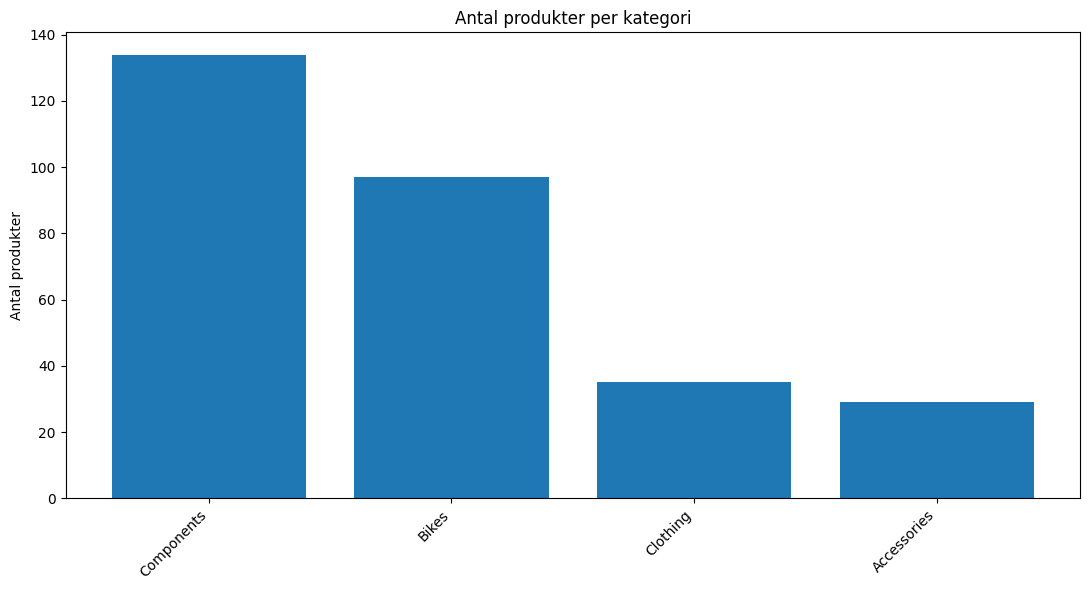

Flest produkter: Components (134)
Minst produkter: Accessories (29)


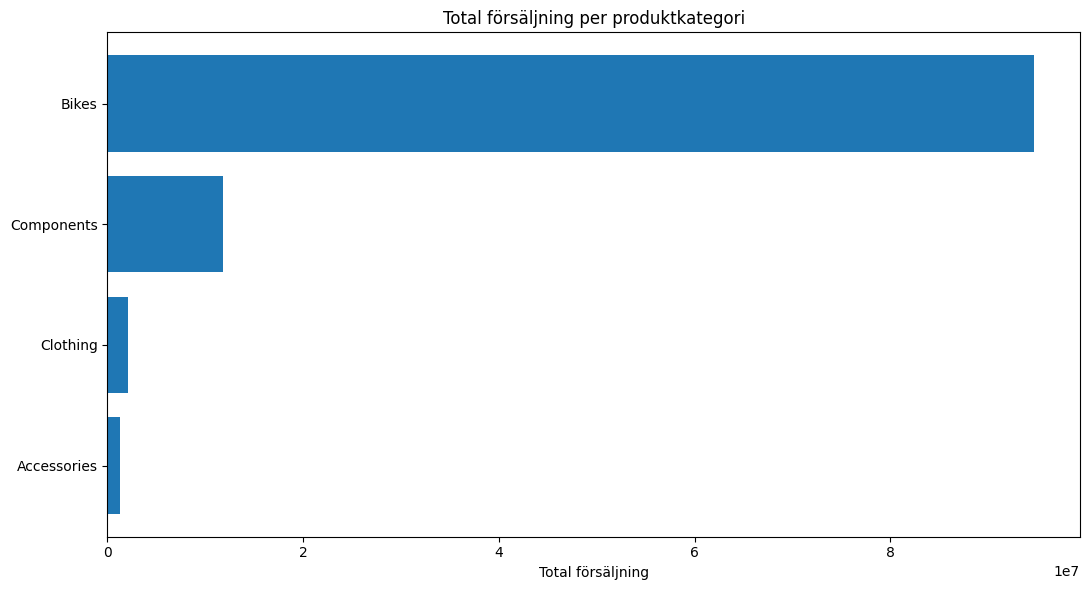

Störst försäljning: Bikes (94651172.704731)
Minst försäljning: Accessories (1272072.883926)


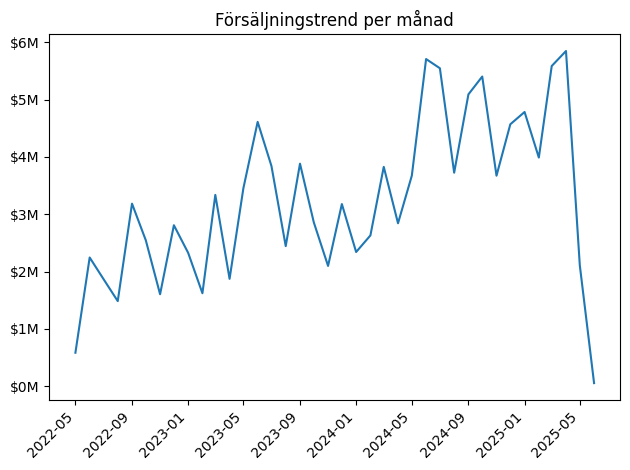

Högsta månad: 2025-04-01 (5847164.693)
Lägsta månad: 2025-06-01 (52478.1872)


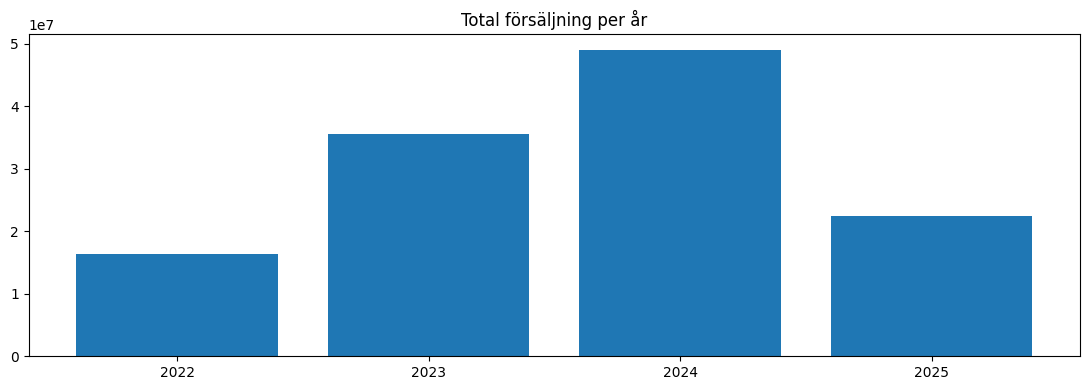

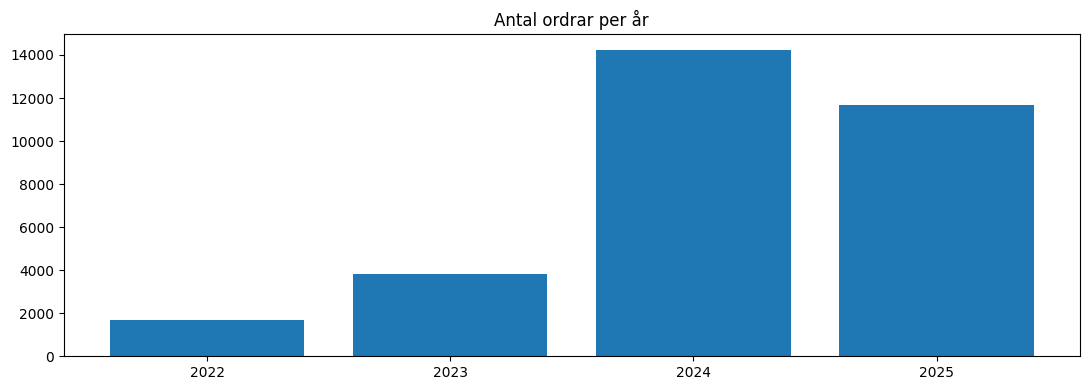

Högst försäljning: 2024 (49,020,487)
Lägst försäljning: 2022 (16,316,694)
Flest ordrar: 2024 (14244)
Minst ordrar: 2022 (1692)


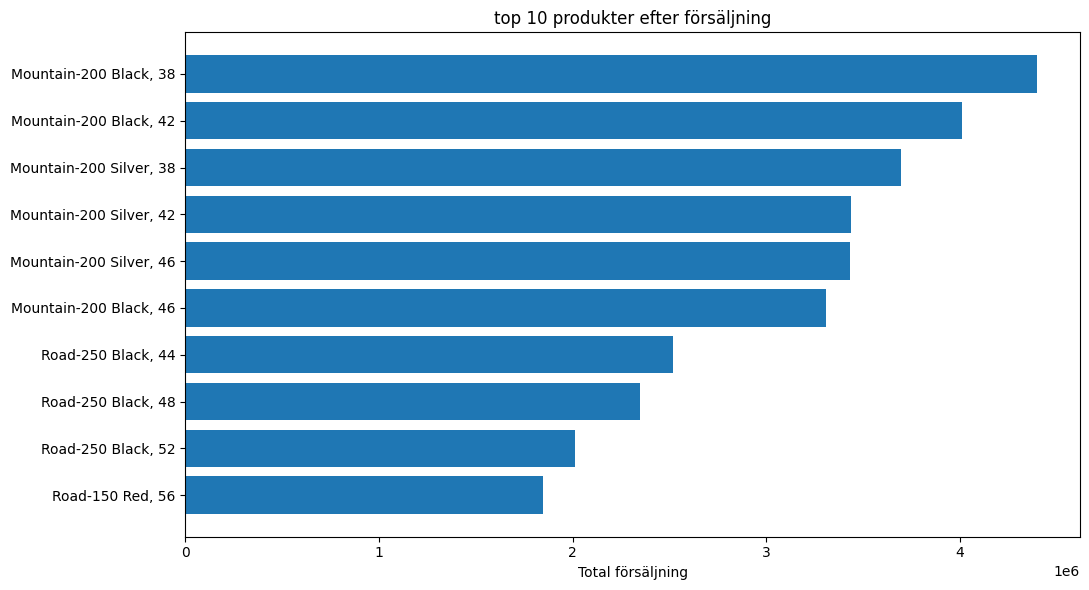

#1 produkt: Mountain-200 Black, 38 (4400592.8004)
Kategori fördelning i top 10:
Category
Bikes    10
Name: count, dtype: int64
Dominerande kategori Bikes


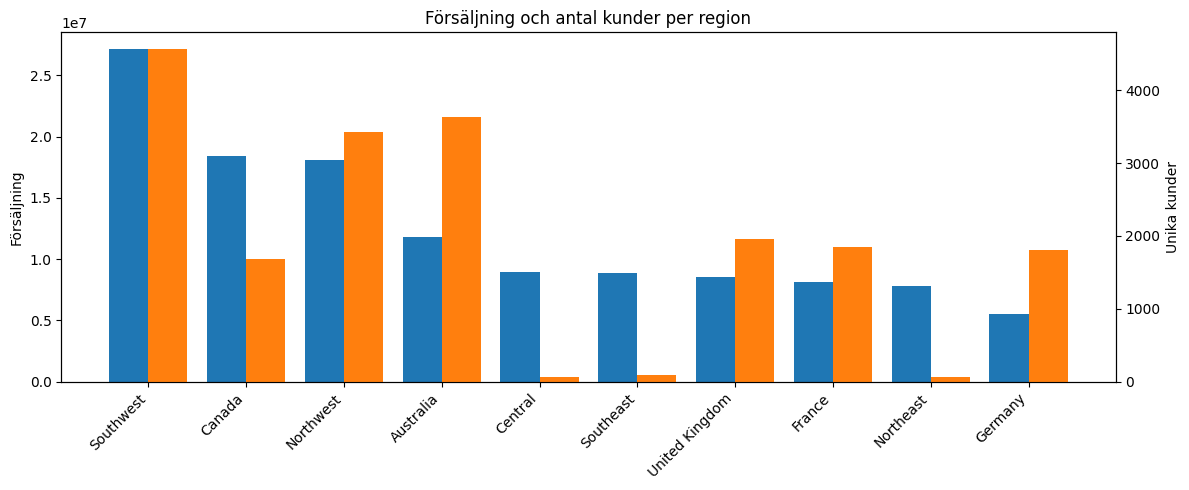

Starkast region: Southwest (27150594.5893)
Svagast region: Germany (5479819.5755)
Southwest sales/kund: 5947.556317480832


,Region,TotalSales,UniqueCustomers
0,Southwest,2.715059e+07,4565
1,Canada,1.839893e+07,1677
2,Northwest,1.806166e+07,3428
3,Australia,1.181438e+07,3625
4,Central,8.913299e+06,69
5,Southeast,8.884099e+06,91
6,United Kingdom,8.574049e+06,1951
7,France,8.119749e+06,1844
8,Northeast,7.820210e+06,57
9,Germany,5.479820e+06,1812


In [2]:
from src import part_one, part_two, part_three, part_four, part_five, part_six

# Varje del tar en run_q funktion som kör SQL -> DataFrame
run_q = lambda sql: q(engine, sql)

part_one.run(run_q)
part_two.run(run_q)
part_three.run(run_q)
part_four.run(run_q)
part_five.run(run_q)
part_six.run(run_q)